In [5]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [6]:
# Imports numpy as np and matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')

In [8]:
titanic = pd.read_csv("../data/titanic.csv", header=0, na_values="?")

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


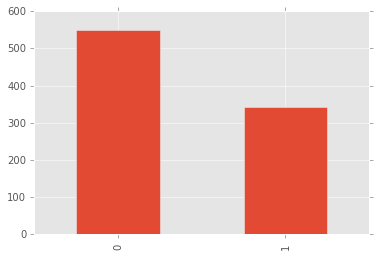

In [10]:
titanic.Survived.value_counts().plot(kind="bar")

In [13]:
# 2. What is the null accuracy rate for predicting survival? 
# (This means the probability of choosing the largest unique category, either survived or not)

# The null accuracy is equal to the number of times the most 
# common response element occurs divided by the total number of rows

null_accuracy = titanic.Survived.value_counts()[0] / len(titanic.Survived)
null_accuracy

0.61616161616161613

In [14]:
# 3. Can you think of some variables that are in the dataset that might contribute to 
# predicting survival of the crash?

# I would think "Cabin", "Pclass", "Sex", and "Age", as wealthy women and children in cabins
# That were close to lifeboats would be the most likely to survive

In [18]:
# 4. Define Pclass and Parch as the features, and Survived as the response.
X = titanic[["Pclass", "Parch"]]
y = titanic.Survived
print X.shape
print y.shape

(891, 2)
(891,)


In [36]:
# 5. Split the data into training and testing sets. 
# (Hint: use the train test split modules from sklearn)
from sklearn import feature_selection as f_select
from sklearn import linear_model as lm
from sklearn import cross_validation as cv

x_train, x_test, y_train, y_test = cv.train_test_split(X, y)   # Default split is 75/25

In [37]:
# 6. Fit a logistic regression model and examine the coefficients to confirm that they make 
# intuitive sense.
model = lm.LogisticRegression().fit(x_train, y_train)
pd.DataFrame(zip(X.columns, model.coef_[0]))

,0,1
0,Pclass,-0.763434
1,Parch,0.264355


In [38]:
# 7. Make predictions on the testing set and calculate the accuracy.
print model.score(x_train, y_train)
print metrics.r2_score(y_train, model.predict(x_train))
print model.score(x_test, y_test)
print metrics.r2_score(y_test, model.predict(x_test))

0.678143712575
-0.355788201754
0.717488789238
-0.209036144578
